In [88]:
from sklearn.decomposition import PCA
from glob import glob
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import warnings
from astropy.utils.exceptions import AstropyUserWarning
warnings.filterwarnings("ignore", category=AstropyUserWarning)
%matplotlib inline

In [89]:
#H_dict = np.load("histograms3.npz")
H_dict = np.load("local_histogram.npz")

In [90]:
H_array = H_dict["H_array"]

In [109]:
pointings_avg = H_dict["pointings_avg"]
pointings_avg

array([[  2.94800059e+02,  -1.24350995e+00],
       [  3.48763149e+02,  -1.25539602e+00],
       [  3.47311010e+02,  -1.51449882e-01],
       [  3.48767089e+02,  -1.40897268e-01],
       [  3.48777971e+02,   9.47396342e-01],
       [  3.41508291e+02,   2.02858207e+00],
       [  3.42967030e+02,   2.03398115e+00],
       [  3.44427934e+02,   2.03509115e+00],
       [  3.45885146e+02,   2.04341856e+00],
       [  3.47347229e+02,   2.04056640e+00],
       [  2.94983596e+02,  -1.23899340e+00],
       [  3.48938395e+02,  -1.24401435e+00],
       [  3.47493622e+02,  -1.48334981e-01],
       [  3.48952854e+02,  -1.52225116e-01],
       [  3.48962891e+02,   9.42326440e-01],
       [  3.41694319e+02,   2.01775507e+00],
       [  3.43150941e+02,   2.03703769e+00],
       [  3.44610710e+02,   2.03101390e+00],
       [  3.46069292e+02,   2.03908741e+00],
       [  3.47529476e+02,   2.03800582e+00],
       [  2.94798312e+02,  -1.51130508e+00],
       [  3.48759372e+02,  -1.53039455e+00],
       [  

In [92]:
bin_number = int(np.sqrt(H_array.shape[1]))

In [93]:
pca = PCA(n_components=5, whiten=False)
pca.fit(H_array)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [94]:
pca.components_.shape

(5, 40000)

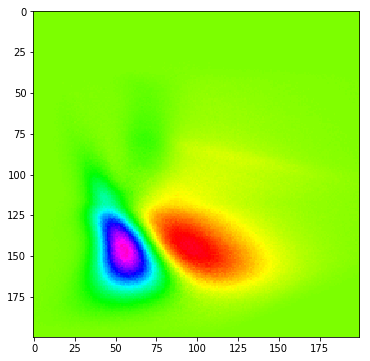

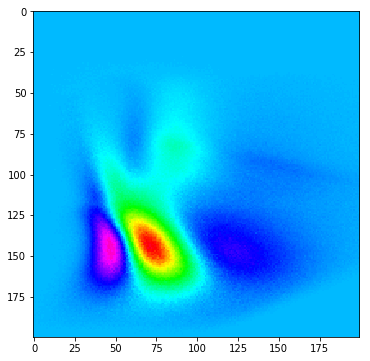

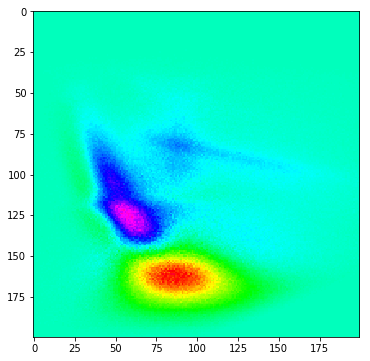

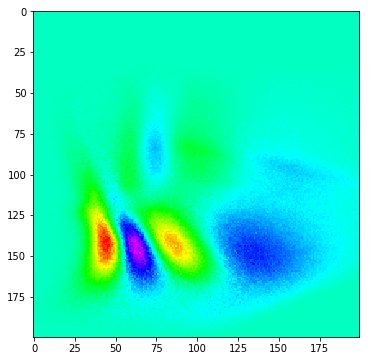

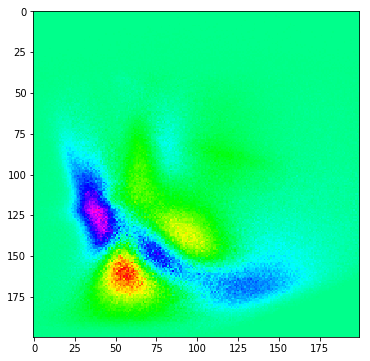

In [112]:
savename = "pc_plots%d_%d.png"
blocknumber = 4
for i in range(5):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6),facecolor='w',edgecolor='k')
    pc = pca.components_[i]
    pc = pc.reshape((bin_number,bin_number))
    ax.imshow(pc.T, cmap='gist_rainbow')
    #ax.invert_yaxis()
    #ax.invert_xaxis()
    
    fig.savefig(savename % (blocknumber, i))

In [103]:
H_small = pca.fit_transform(H_array)

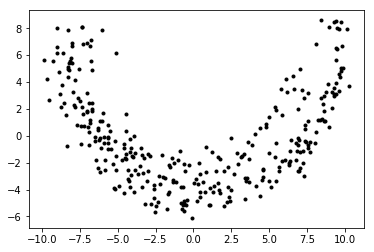

In [104]:
plt.plot(H_small[:,0], H_small[:,1], 'k.')
#plt.savefig("banana.png")

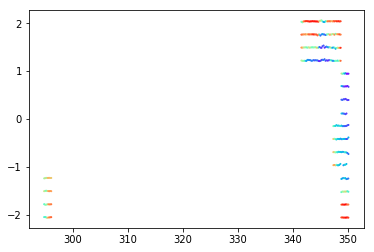

In [105]:
plt.scatter(pointings_avg[:,0], pointings_avg[:,1], c=H_small[:,0], cmap='rainbow', s=1);

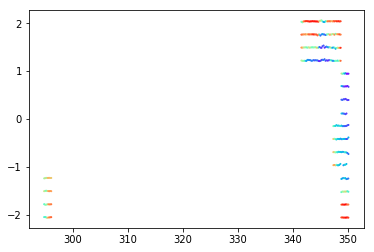

In [108]:
%matplotlib inline
plt.scatter(pointings_avg[:,0], pointings_avg[:,1], c=H_small[:,0], cmap='rainbow', s=1);

(array([ 3396.,  2383.,  1901.,  1856.,  1690.,  1354.,   814.,   617.,
          539.,   482.,   391.,   398.,   356.,   299.,   328.,   268.,
          256.,   253.,   243.,   197.,   211.,   210.,   192.,   179.,
          152.,   141.,   128.,   125.,    94.,    84.,    92.,    76.,
           65.,    60.,    61.,    58.,    58.,    54.,    44.,    42.,
           56.,    41.,    45.,    42.,    38.,    34.,    31.,    34.,
           28.,    11.]),
 array([ 0.01000039,  0.014201  ,  0.0184016 ,  0.0226022 ,  0.0268028 ,
         0.0310034 ,  0.035204  ,  0.0394046 ,  0.04360521,  0.04780581,
         0.05200641,  0.05620701,  0.06040761,  0.06460821,  0.06880881,
         0.07300942,  0.07721002,  0.08141062,  0.08561122,  0.08981182,
         0.09401242,  0.09821302,  0.10241363,  0.10661423,  0.11081483,
         0.11501543,  0.11921603,  0.12341663,  0.12761723,  0.13181784,
         0.13601844,  0.14021904,  0.14441964,  0.14862024,  0.15282084,
         0.15702144,  0.1612220

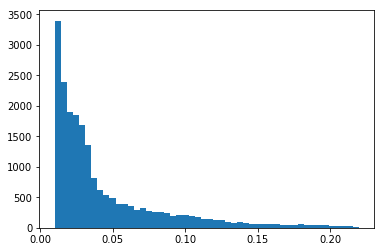

In [107]:
stddev = H_array.std(axis=0)
stddev = stddev[stddev>0.01]
plt.hist(stddev, bins=50)
